# IDMP Project

## Importing necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import xgboost as xgb

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Impoering Dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/online_shoppers_intention(1).csv", header = 0)

## Data Preprocessing

#### We can have a quick look at the data type in each column of our dataset to make sure if there are any missing values. 

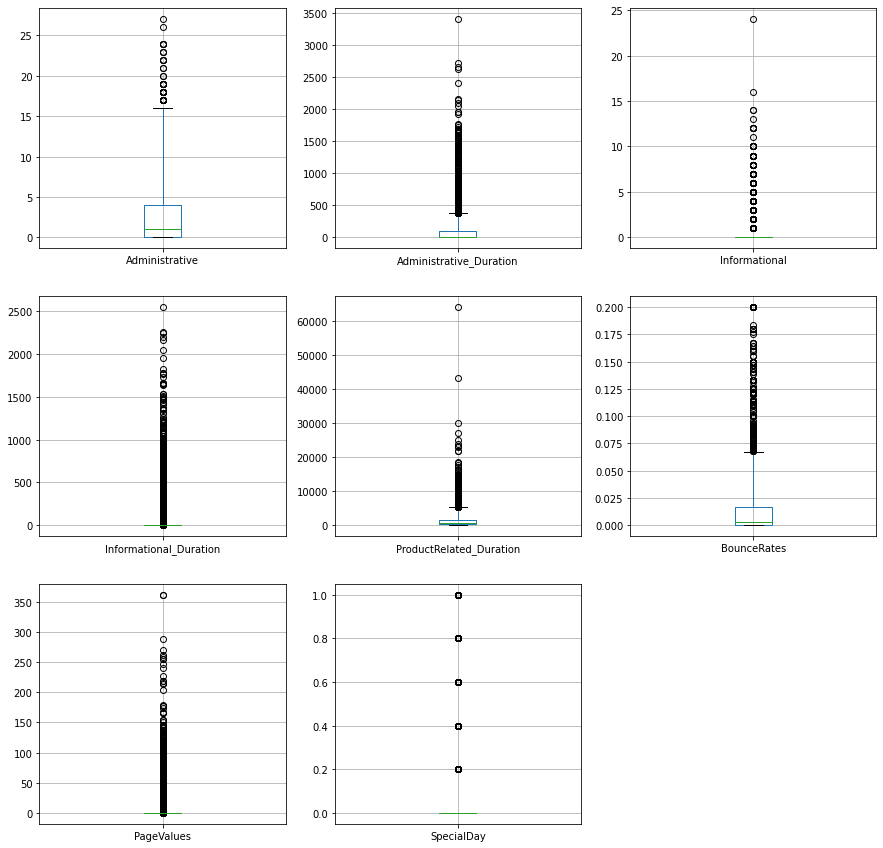

In [ ]:
plt.figure(figsize=(15,15))
plt.axes().set(facecolor='Blue')
for i, col in enumerate(['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay'], start=1):
    plt.subplot(3, 3, i)
    data.boxplot(col,whis=3)
plt.show()

In [ ]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

#### Month and VisitorType are object type, we can quickly check if there is any missing values by counting the values.

In [ ]:
print(data['Month'].value_counts())
print(data['VisitorType'].value_counts())

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


## STEP 2 : Data preprocessing

#### As we have categorical features in our dataset, we need to encode them before so we can use them in our analysis later. 

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(),['Month','OperatingSystems','Browser','VisitorType','Weekend']),remainder='passthrough')

# Scaler
scalar = MinMaxScaler()

# Purchased
dataset_p = data[data.Revenue==True]
# Not Purchased
dataset_np = data[data.Revenue==False]

# Downsampled Dataset
# dataset_p_down = resample(dataset_p,replace=False,n_samples=1000)
# dataset_np_down = resample(dataset_np,replace=False,n_samples=5000)
# dataset = pd.concat([dataset_p_down,dataset_np_down])

dataset = data
from imblearn.over_sampling import SMOTEN

smoten = SMOTEN()

# dataset_p_down = resample(dataset_p,replace=False,n_samples=1000)
# dataset_np_down = resample(dataset_np,replace=False,n_samples=5000)
# dataset = pd.concat([dataset_p_down,dataset_np_down])

# Identifying the class label
X = dataset.drop(columns=['Revenue'])
y = dataset['Revenue']

# Encoding categorical features
column_trans.fit(X)
X = column_trans.transform(X)

print(column_trans.get_feature_names())

X = pd.DataFrame(X)

X,y = smoten.fit_resample(X, y)

# Creating training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=50)

#X_train, y_train = sm.fit_resample(X_train, y_train)
#X_test, y_test = sm.fit_resample(X_test, y_test)

# Center and normalize the data
scalar.fit(X)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['onehotencoder__x0_Aug', 'onehotencoder__x0_Dec', 'onehotencoder__x0_Feb', 'onehotencoder__x0_Jul', 'onehotencoder__x0_June', 'onehotencoder__x0_Mar', 'onehotencoder__x0_May', 'onehotencoder__x0_Nov', 'onehotencoder__x0_Oct', 'onehotencoder__x0_Sep', 'onehotencoder__x1_1', 'onehotencoder__x1_2', 'onehotencoder__x1_3', 'onehotencoder__x1_4', 'onehotencoder__x1_5', 'onehotencoder__x1_6', 'onehotencoder__x1_7', 'onehotencoder__x1_8', 'onehotencoder__x2_1', 'onehotencoder__x2_2', 'onehotencoder__x2_3', 'onehotencoder__x2_4', 'onehotencoder__x2_5', 'onehotencoder__x2_6', 'onehotencoder__x2_7', 'onehotencoder__x2_8', 'onehotencoder__x2_9', 'onehotencoder__x2_10', 'onehotencoder__x2_11', 'onehotencoder__x2_12', 'onehotencoder__x2_13', 'onehotencoder__x3_New_Visitor', 'onehotencoder__x3_Other', 'onehotencoder__x3_Returning_Visitor', 'onehotencoder__x4_False', 'onehotencoder__x4_True', 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'Pr

In [ ]:
column_trans.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['onehotencoder__x0_Aug',
 'onehotencoder__x0_Dec',
 'onehotencoder__x0_Feb',
 'onehotencoder__x0_Jul',
 'onehotencoder__x0_June',
 'onehotencoder__x0_Mar',
 'onehotencoder__x0_May',
 'onehotencoder__x0_Nov',
 'onehotencoder__x0_Oct',
 'onehotencoder__x0_Sep',
 'onehotencoder__x1_1',
 'onehotencoder__x1_2',
 'onehotencoder__x1_3',
 'onehotencoder__x1_4',
 'onehotencoder__x1_5',
 'onehotencoder__x1_6',
 'onehotencoder__x1_7',
 'onehotencoder__x1_8',
 'onehotencoder__x2_1',
 'onehotencoder__x2_2',
 'onehotencoder__x2_3',
 'onehotencoder__x2_4',
 'onehotencoder__x2_5',
 'onehotencoder__x2_6',
 'onehotencoder__x2_7',
 'onehotencoder__x2_8',
 'onehotencoder__x2_9',
 'onehotencoder__x2_10',
 'onehotencoder__x2_11',
 'onehotencoder__x2_12',
 'onehotencoder__x2_13',
 'onehotencoder__x3_New_Visitor',
 'onehotencoder__x3_Other',
 'onehotencoder__x3_Returning_Visitor',
 'onehotencoder__x4_False',
 'onehotencoder__x4_True',
 'Administrative',
 'Administrative_Duration',
 'Informational',
 'Informa

In [ ]:
print(y_train.value_counts() + y_test.value_counts())
data['Revenue'].value_counts()

False    10422
True     10422
Name: Revenue, dtype: int64


False    10422
True      1908
Name: Revenue, dtype: int64

## STEP 3 : Data Visualisation

## Features correlation matrix

#### To have an idea of correlation between our variables we can plot the correlation matrix.

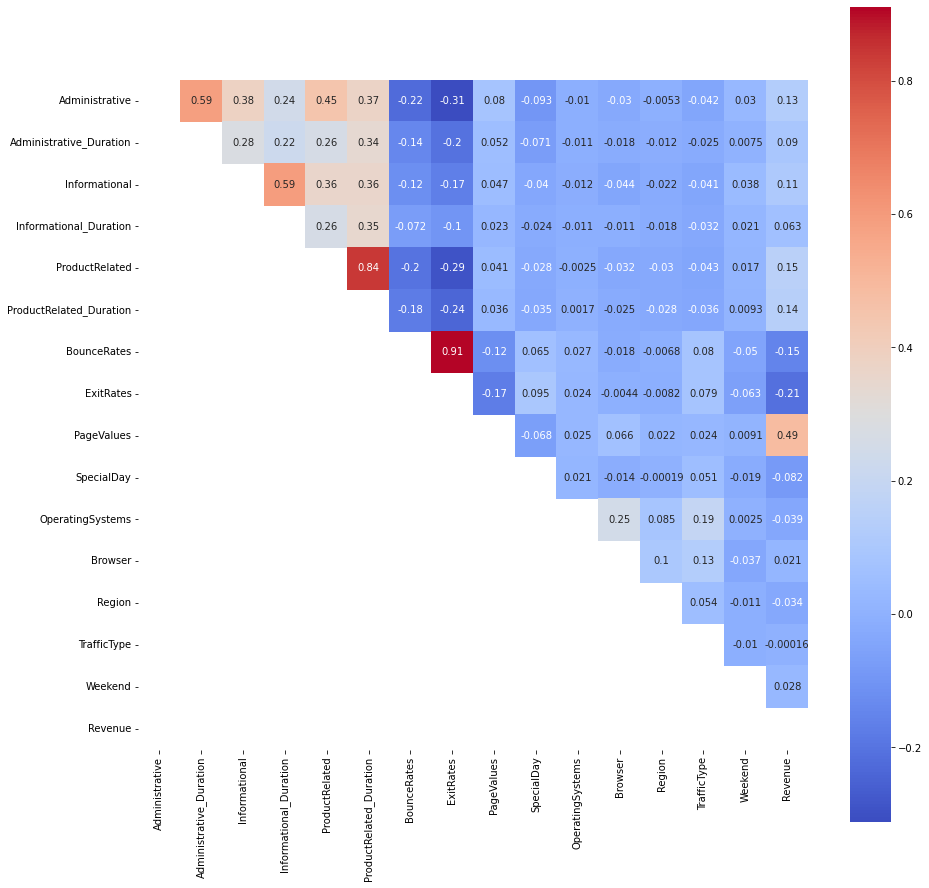

In [ ]:
plt.subplots(figsize=(15,15))
matrix = np.tril(data.corr())
sns.heatmap(dataset.corr(), annot = True, cmap= 'coolwarm',square=True,mask = matrix)

#### We see in the last column that the target is only correlated to a small number of variables in this dataset.

## Principal Component Analysis

#### We can use principal component analysis to see if we can have a good representation of our dataset in two or three dimensions. 

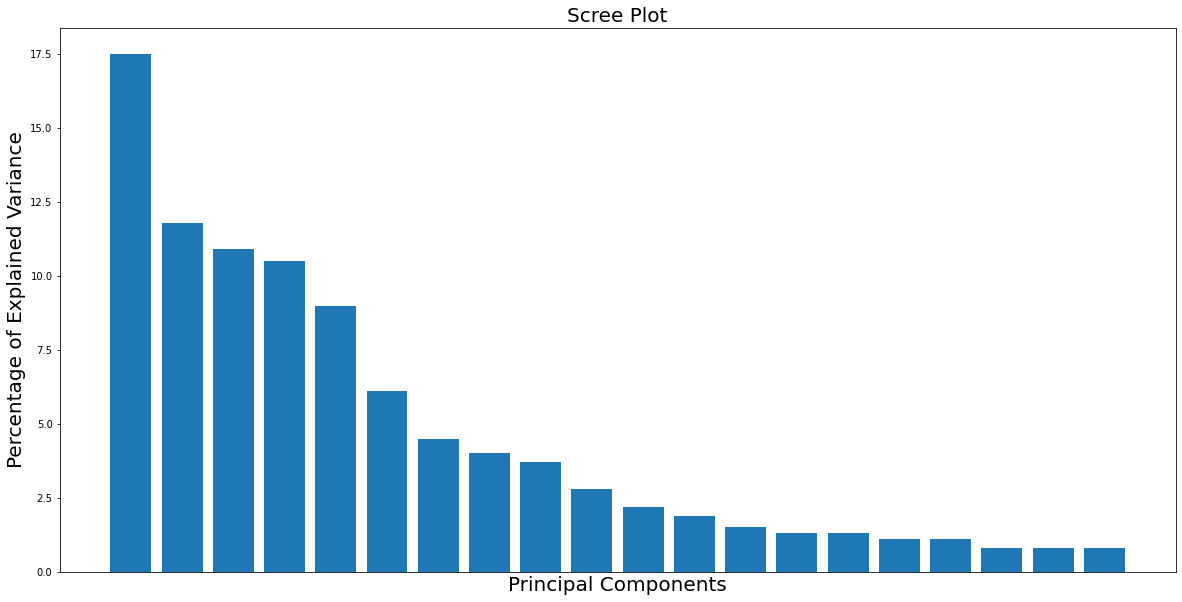

In [ ]:
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = [str(x) for x in range(1,len(per_var)+1)]
plt.rcParams['figure.figsize'] = (20, 10)
font=20
plt.bar(x=range(1,len(per_var)+1),height=per_var)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.ylabel('Percentage of Explained Variance', fontsize = font)
plt.xlabel('Principal Components', fontsize = font)
plt.title('Scree Plot', fontsize = font)
plt.show()

#### Because the percentage of explained variance decay slowly, it is not possible to represent well our dataset in two or three dimensions.

## 2D PCA Plot

#### We can have a look at our dataset in a 2D Plot.

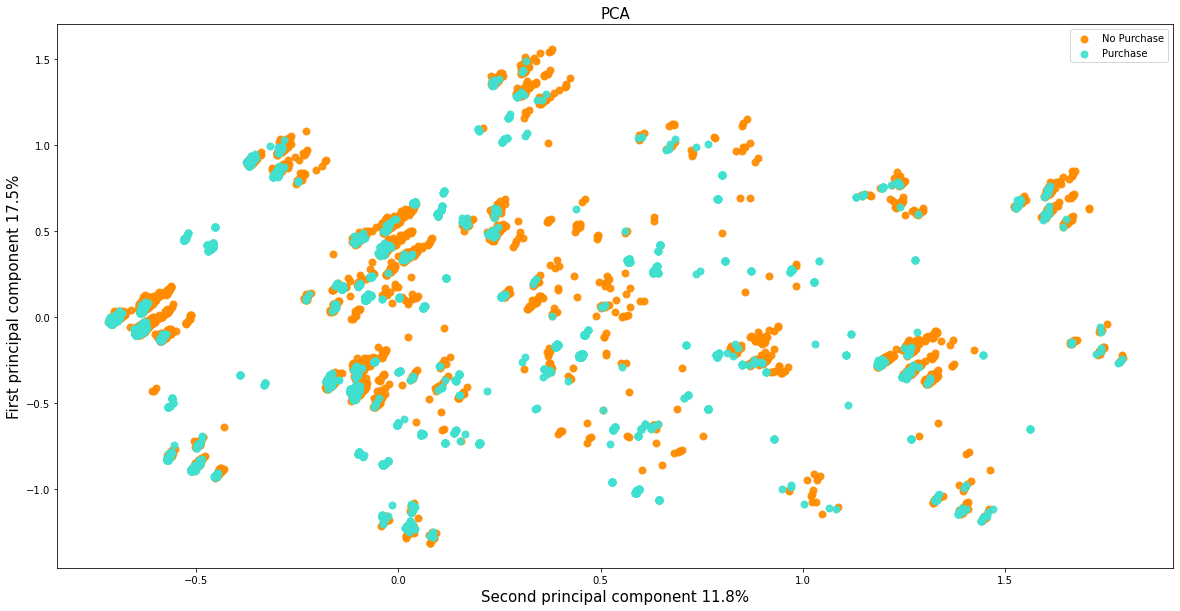

In [ ]:
X_r = pca.fit(X_train).transform(X_train)
plt.figure()
colors = ['darkorange', 'turquoise']
lw = 2
target_names= ["No Purchase","Purchase"]

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y_train == i, 0], X_r[y_train == i, 1], color=color, alpha=.9, lw=lw,
                label=target_name)

font=15
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA',fontsize=font)
pca100 = pca.explained_variance_ratio_
D1 = "First principal component " + str(round(pca100[0] * 100,1)) + "%"
D2 = "Second principal component " + str(round(pca100[1] * 100,1)) + "%"
plt.ylabel(D1,fontsize=font)
plt.xlabel(D2,fontsize=font)
plt.rcParams['figure.figsize'] = (15, 10)
plt.show()

#### There are 12 clusters that may correspond to the 12 months.

## Univariate Analysis

#### We can look at the dataset balance with a few bar plots.

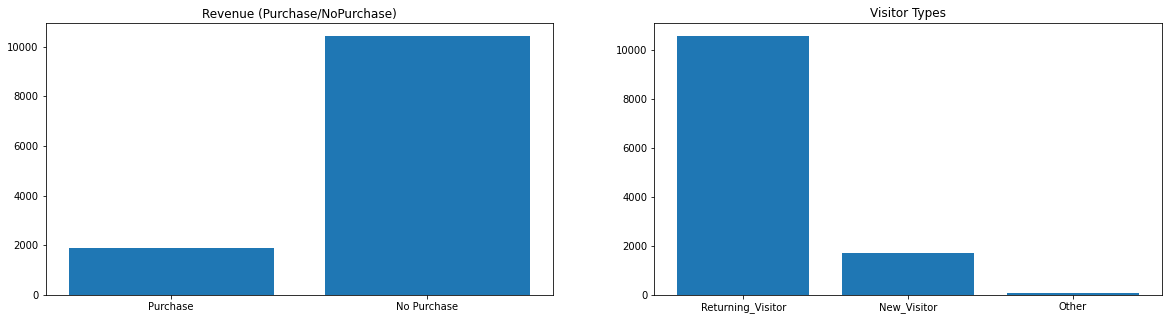

In [ ]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(20,5)

#Visitor Types
axs[1].set_title("Visitor Types")
Vtype = ['Returning_Visitor','New_Visitor','Other']
count_vtype = [data['VisitorType'].value_counts()['Returning_Visitor'],
               data['VisitorType'].value_counts()['New_Visitor'],
               data['VisitorType'].value_counts()['Other']]
axs[1].bar(Vtype,count_vtype)

#Number of Purchased
axs[0].set_title("Revenue (Purchase/NoPurchase)")
TF = ["Purchase","No Purchase"]
TF_count = [data['Revenue'].value_counts()[True],data['Revenue'].value_counts()[False]]
axs[0].bar(TF,TF_count)

plt.show()

#### We have approximately 5 times more negative entries and most of our dataset is composed of Returning_Visitors

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Purchase each month')

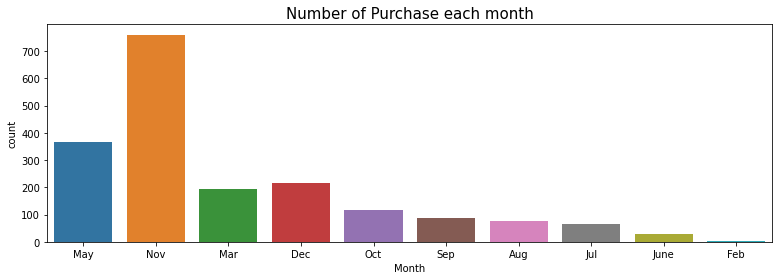

In [ ]:
plt.figure(figsize=(13, 4))
sns.countplot(dataset_p.Month.dropna(), order = data.Month.value_counts().index);
plt.title('Number of Purchase each month', fontsize = 15)

#### The number of 'purchase' is very important in November, maybe it is because of Black Friday ? ;)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of No Purchase each month')

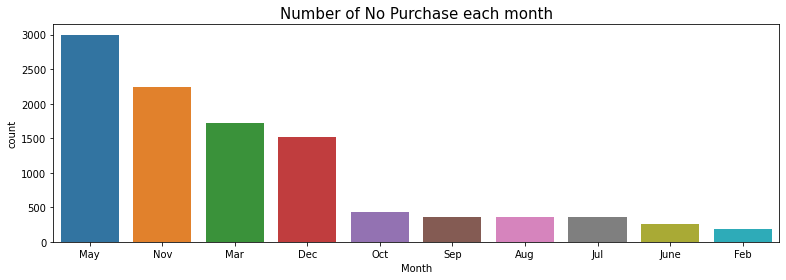

In [ ]:
plt.figure(figsize=(13, 4))
sns.countplot(dataset_np.Month.dropna(), order = data.Month.value_counts().index);
plt.title('Number of No Purchase each month', fontsize = 15)

#### The number of “no purchase” sessions is more important in May, November, March and December, showing that there are more visits to the site these months.

## Bivariate analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


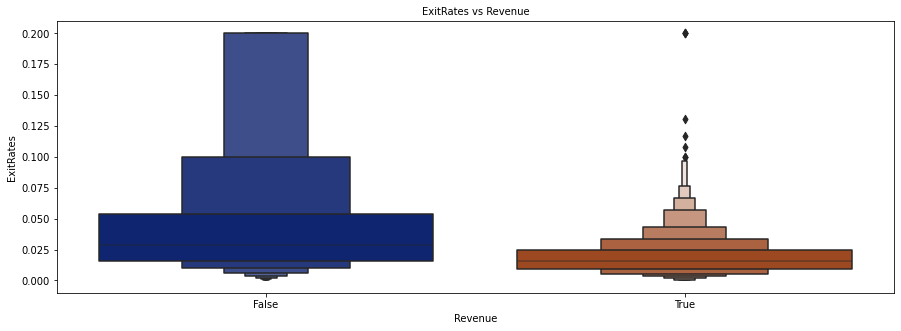

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
# exit rate vs raevenue
sns.boxenplot(data['Revenue'], data['ExitRates'], palette = 'dark')
plt.title('ExitRates vs Revenue', fontsize = 10)
plt.xlabel('Revenue', fontsize = 10)
plt.ylabel('ExitRates', fontsize = 10)

plt.show()

#### Differences in ExitRates are not that significant by Revenue. We can note that the ExitRates are a little lower when there is a 'Purchase'.

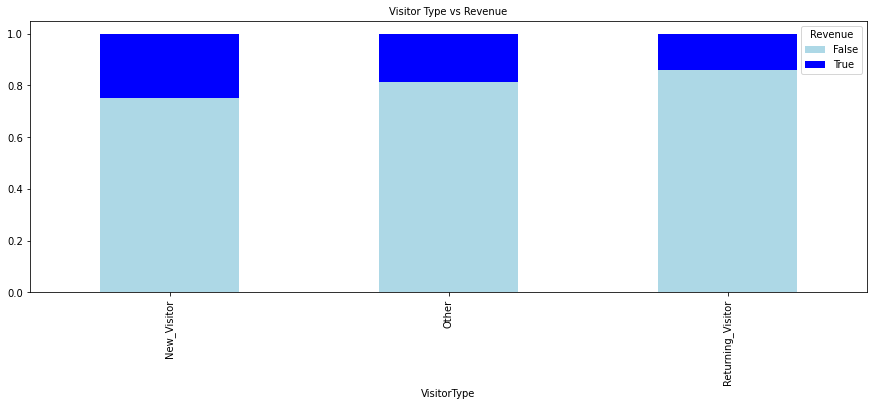

In [ ]:
df = pd.crosstab(data['VisitorType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Visitor Type vs Revenue', fontsize = 10)
plt.show()

#### This crosstab shows us that the Visitor_Type has almost no influence on the number of Purchases.

## Multivariate analysis

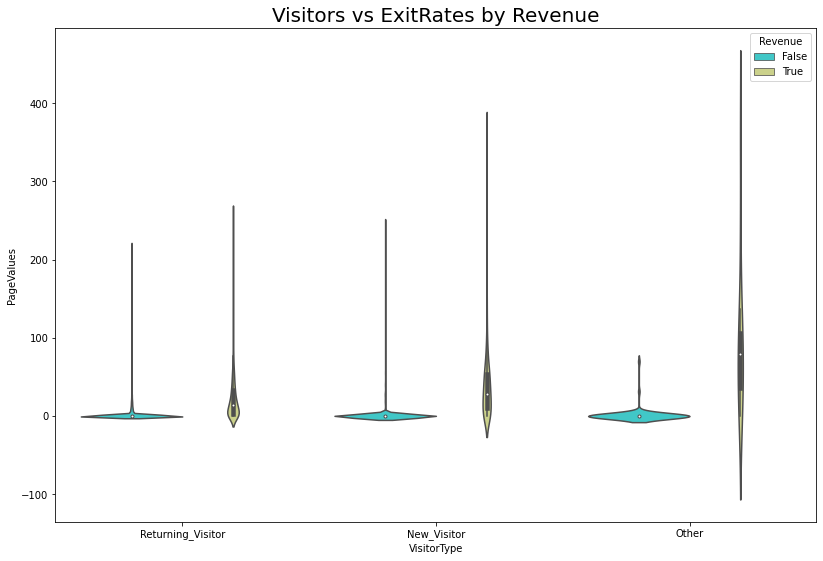

In [ ]:
plt.rcParams['figure.figsize'] = (30, 20)
plt.subplot(2, 2, 1)
sns.violinplot(x = data['VisitorType'], y = data['PageValues'], hue = data['Revenue'], palette = 'rainbow')
plt.title('Visitors vs ExitRates by Revenue', fontsize = 20)
plt.show()

#### The violin plot is showing us the same pattern for each visitor type. Page Value for most of the entries are close to 0 when the Revenue is False. But the values are spread out when Revenue is True. This may come from the definition of the PageValue, which gives a value close to 0 to pages which did not generate a lot of revenue.

## STEP 4: Building ML Model

## Overview of a few model's performance

#### Let's compare a few algorithms that can be used for classification to see the performance of each ones.

Naive Bayes 
 Accuracy: 0.6896414342629482 
 F-score 0.7532467532467533


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression 
 Accuracy: 0.9099601593625498 
 F-score 0.9074529074529074
K Nearest Neighbour 
 Accuracy: 0.8780876494023905 
 F-score 0.8725
Support Vector Classification 
 Accuracy: 0.8928286852589642 
 F-score 0.8858718710224862
Decision Tree Classification 
 Accuracy: 0.8760956175298805 
 F-score 0.8730093915884035
Stochastic Gradient Descent 
 Accuracy: 0.9111553784860558 
 F-score 0.9046601111586149
Linear Discriminant Analysis 
 Accuracy: 0.9087649402390439 
 F-score 0.9067969067969067
Gradient Boosting Classification  
 Accuracy: 0.9270916334661354 
 F-score 0.9260606060606061
Random Forest Classification 
 Accuracy: 0.9059760956175299 
 F-score 0.9004219409282701


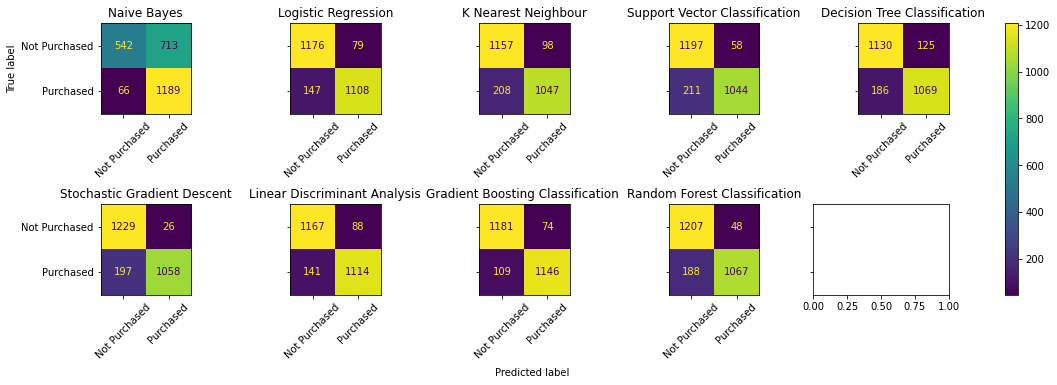

In [ ]:
classifiers = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "K Nearest Neighbour": KNeighborsClassifier(),
    "Support Vector Classification": SVC(),
    "Decision Tree Classification": DecisionTreeClassifier(),
    "Stochastic Gradient Descent": SGDClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Gradient Boosting Classification ": GradientBoostingClassifier(),
    "Random Forest Classification": RandomForestClassifier()
    }

f, axes = plt.subplots(2, 5, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    j = 0
    k = i
    if i>4:
        k = i-5
        j+=1
    
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(key, "\n Accuracy:",accuracy_score(y_test,y_pred),"\n F-score",f1_score(y_test,y_pred))
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=["Not Purchased","Purchased"])
    disp.plot(ax=axes[j][k], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.43, -0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=1)


f.colorbar(disp.im_, ax=axes)
plt.show()

#### The four best performing ones are Random Forest, Gradient Boosting, Stochastic Gradient Descent and Decision Tree.

## STEP 5 : Model Tuning (Grid Search)

#### We will tune the hyperparameters of our four best performing algorithms to see if we can improve the accuracy and f-score. We have to tune our parameters by the F-score because our dataset is unbalanced.

## Gradient Boosting

In [ ]:
parameters = [{
    "loss":["deviance"],
    "learning_rate": [0.2,0.3,0.4],
    "min_samples_split": [0.01,0.1, 0.5],
    "min_samples_leaf": [0.0001,0.001, 0.01],
    "max_depth":[8,10,15],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.7,0.8,0.9],
    "n_estimators":[10,20,30]
    }]
gbm = RandomizedSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=-1,scoring='f1', verbose=True)
gbm.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions=[{'criterion': ['friedman_mse', 'mae'],
                                         'learning_rate': [0.2, 0.3, 0.4],
                                         'loss': ['deviance'],
                                         'max_depth': [8, 10, 15],
                                         'max_features': ['log2', 'sqrt'],
                                         'min_samples_leaf': [0.0001, 0.001,
                                                              0.01],
                                         'min_samples_split': [0.01, 0.1, 0.5],
                                         'n_estimators': [10, 20, 30],
                                         'subsample': [0.7, 0.8, 0.9]}],
                   scoring='f1', verbose=True)

In [ ]:
print(gbm.best_params_)

{'subsample': 0.7, 'n_estimators': 30, 'min_samples_split': 0.01, 'min_samples_leaf': 0.001, 'max_features': 'log2', 'max_depth': 15, 'loss': 'deviance', 'learning_rate': 0.2, 'criterion': 'friedman_mse'}


In [ ]:
# Gradient boosting with best parameters
gs_gbm = GradientBoostingClassifier( 
    **gbm.best_params_
)
gs_gbm.fit(X_train, y_train)
gs_gbm.score(X_test,y_test)

0.9403581707707067

## Support Vector Classifier

In [ ]:
svm = SVC(probability=True)
parameters = {"C": np.arange(2, 10, 2),
             "gamma": np.arange(0.1, 1, 0.2),
             'kernel': ['linear', 'rbf']}
svm = RandomizedSearchCV(svm, parameters, cv=5, n_jobs=-1,scoring='f1', verbose=True)
svm.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': array([2, 4, 6, 8]),
                                        'gamma': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                                        'kernel': ['linear', 'rbf']},
                   scoring='f1', verbose=True)

In [ ]:
print(svm.best_params_)

{'kernel': 'linear', 'gamma': 0.5000000000000001, 'C': 8}


In [ ]:
# Stochastic gradient descent with best parameters
gs_svm = SVC(**svm.best_params_)
gs_svm.fit(X_train, y_train)
gs_svm.score(X_test,y_test)

0.9154141349536297

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

(14590,)

No handles with labels found to put in legend.


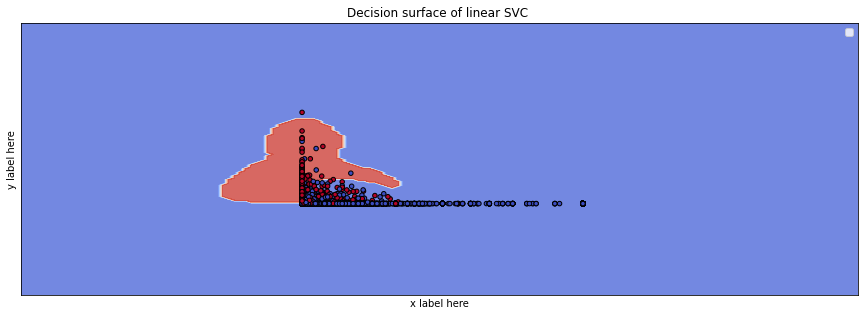

In [ ]:
model = SVC(kernel='rbf')
clf = model.fit(X_train[:, [42, 44]], y_train)


fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X_train[:, 42], X_train[:, 44]
xx, yy = make_meshgrid(X0, X1)

# print(X0.shape, y_train.shape)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

No handles with labels found to put in legend.


## Random Forest

In [ ]:
parameters = [{
    "criterion": ["gini",  "entropy"],
    "n_estimators": [200,400,600,800,1000],
    "max_features": ['auto', 'sqrt'],
    "max_depth": [5, 50, 100],
    "min_samples_split": [5,10,15,20,25,30], 
    "min_samples_leaf": [1,5,10,15,20],
    "bootstrap": [True, False]
             }]

rf = RandomizedSearchCV(RandomForestClassifier(), 
                  parameters, 
                  cv=5, 
                  n_jobs=-1,
                  scoring='f1', 
                  verbose=True)

rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'criterion': ['gini', 'entropy'],
                                         'max_depth': [5, 50, 100],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 5, 10, 15, 20],
                                         'min_samples_split': [5, 10, 15, 20,
                                                               25, 30],
                                         'n_estimators': [200, 400, 600, 800,
                                                          1000]}],
                   scoring='f1', verbose=True)

In [ ]:
print(rf.best_params_)

{'n_estimators': 800, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 50, 'criterion': 'entropy', 'bootstrap': True}


In [ ]:
# Random forest with best parameters
gs_rf = RandomForestClassifier(**rf.best_params_)
gs_rf.fit(X_train, y_train)
gs_rf.score(X_test,y_test)

0.940677966101695

In [ ]:
important_features = pd.Series(data=gs_rf.feature_importances_,index=column_trans.get_feature_names())
important_features.sort_values(ascending=False,inplace=True)
print("Important features (in descending order) are:\n")
print(important_features[:8])

Important features (in descending order) are:

PageValues                 0.295090
ExitRates                  0.153714
BounceRates                0.091986
ProductRelated_Duration    0.051621
Region                     0.043155
Administrative_Duration    0.042953
TrafficType                0.042461
ProductRelated             0.039865
dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


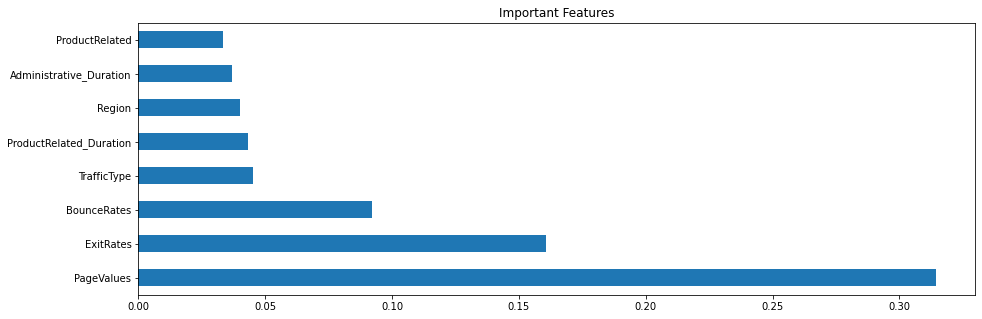

In [ ]:
important_features[:8].plot(kind='barh')
plt.title("Important Features")
plt.show()

## Decision Tree

In [ ]:
parameters = [{
    "criterion": ['gini','entropy'],
    "max_depth": range(1,10),
    "min_samples_split": range(1,10), 
    "min_samples_leaf": [1,2,5,10],
             }]

dt = RandomizedSearchCV(DecisionTreeClassifier(),
                  parameters, 
                  cv=5, n_jobs=-1,
                  scoring='f1', 
                  verbose=True)

dt.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a float in 

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': range(1, 10),
                                         'min_samples_leaf': [1, 2, 5, 10],
                                         'min_samples_split': range(1, 10)}],
                   scoring='f1', verbose=True)

In [ ]:
print(dt.best_params_)

{'min_samples_split': 8, 'min_samples_leaf': 10, 'max_depth': 9, 'criterion': 'gini'}


In [ ]:
# Decision Tree with best parameters
gs_dt = DecisionTreeClassifier(**dt.best_params_)
gs_dt.fit(X_train, y_train)
gs_dt.score(X_test,y_test)

0.915893827950112

In [ ]:
from xgboost import XGBClassifier
import random
from random import randint
XGB_tunned_pca=XGBClassifier(random_state=0)
params = {
        'n_estimators': range(1,10),
        'min_child_weight': [0.001,0.003,0.01],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'booster':["gbtree"],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': range(2,10)
        }

rsearch_xgb=RandomizedSearchCV(XGB_tunned_pca,params,scoring = "f1_micro",cv=3,n_iter=200,n_jobs=-1,random_state=0)

rsearch_xgb.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=XGBClassifier(), n_iter=200, n_jobs=-1,
                   param_distributions={'booster': ['gbtree'],
                                        'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': range(2, 10),
                                        'min_child_weight': [0.001, 0.003,
                                                             0.01],
                                        'n_estimators': range(1, 10),
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=0, scoring='f1_micro')

In [ ]:
print(rsearch_xgb.best_params_)

{'subsample': 1.0, 'n_estimators': 8, 'min_child_weight': 0.01, 'max_depth': 9, 'gamma': 1.5, 'colsample_bytree': 0.8, 'booster': 'gbtree'}


In [ ]:
gs_xgb = XGBClassifier(**dt.best_params_)
gs_xgb.fit(X_train, y_train)
print(gs_dt.score(X_test,y_test))
f1_score(y_test,gs_xgb.predict(X_test),average='micro')

0.915893827950112


0.9419571474256476

## STEP 6 : Ensemble Model Building

#### We will now compare our four model's performance.

Gradient Boosting  
 Accuracy: 0.9417972497601536 
 F-score 0.9413281753707284
Random Forest  
 Accuracy: 0.9417972497601536 
 F-score 0.9409857328145266
Decision Tree  
 Accuracy: 0.9157339302846178 
 F-score 0.9158012462054642
SVM  
 Accuracy: 0.9154141349536297 
 F-score 0.9132929028028192
XGBoost  
 Accuracy: 0.9419571474256476 
 F-score 0.941555305103848


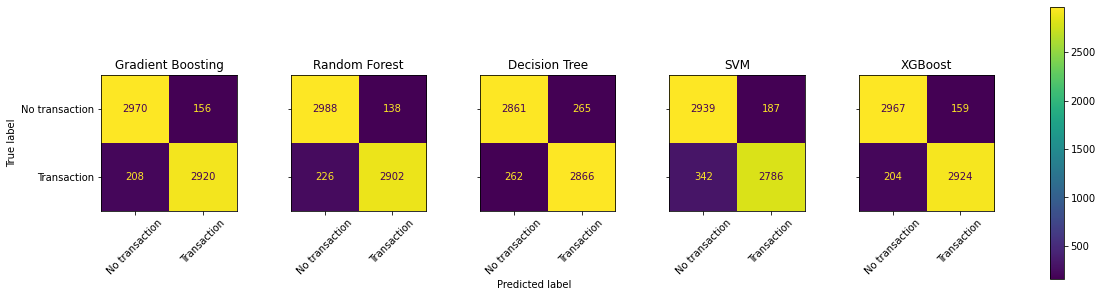

In [ ]:
classifiers = {
    "Gradient Boosting": gs_gbm,
    "Random Forest": gs_rf,
    "Decision Tree": gs_dt,
    "SVM": gs_svm,
    "XGBoost": gs_xgb
}

f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(key, " \n Accuracy:",accuracy_score(y_test,y_pred),"\n F-score",f1_score(y_test,y_pred))
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=["No transaction","Transaction"])
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()

#### Now we will make a model out of our three best performing ones.

In [ ]:
# Combination of the three best models
estimators=[('Gradient Boosting', gs_gbm), ('Random Forest',gs_rf),('Decision Tree',gs_dt), ('XG Bosst', gs_xgb)]
ensemble = VotingClassifier(estimators, voting='soft')
ensemble.fit(X_train, y_train)
y_pred = ensemble.fit(X_train, y_train).predict(X_test)
print(" Accuracy : ",accuracy_score(y_test,y_pred),"\n F-score",f1_score(y_test,y_pred))

 Accuracy :  0.9413175567636712 
 F-score 0.9409493161705551


In [ ]:
y_train.value_counts() + y_test.value_counts()

False    10422
True     10422
Name: Revenue, dtype: int64

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

acc_train_sm = []
auc_train_sm = []

acc_test_sm = []
auc_test_sm = []



def model_graph(name,algo, Xtrain,ytrain,Xtest,ytest):   
  
    algo.fit(Xtrain,ytrain)
    ytrain_pred =algo.predict(Xtrain)
    ytrain_prob = algo.predict_proba(Xtrain)[:,1]

    acc_train_sm.append(accuracy_score(ytrain, ytrain_pred))
    auc_train_sm.append(roc_auc_score(ytrain, ytrain_prob))

    ytest_pred = algo.predict(Xtest)
    ytest_prob = algo.predict_proba(Xtest)[:,1]

    acc_test_sm.append(accuracy_score(ytest, ytest_pred))
    auc_test_sm.append(roc_auc_score(ytest, ytest_prob))


    fpr,tpr,th=roc_curve(ytest, ytest_prob)
    
    #ax[i].plot(fpr, tpr, label=name)
    #ax[i].plot(fpr, fpr)
    #ax[i].title(name)

    plt.plot(fpr,tpr,label=name)
    plt.plot(fpr,fpr)
    plt.legend(loc="lower right")

plt.show()

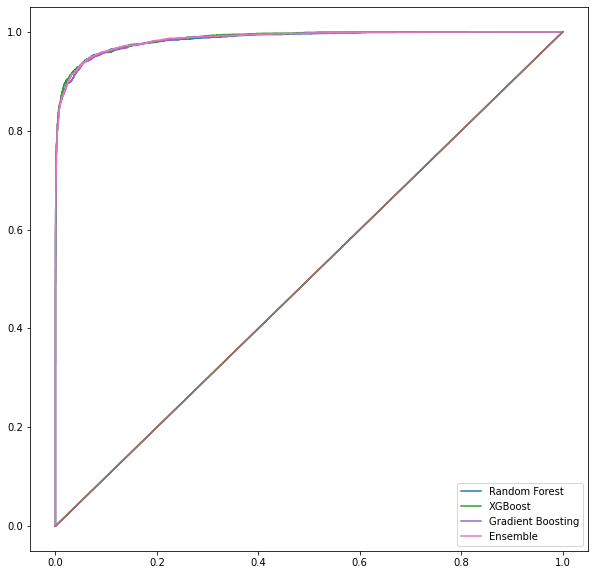

In [ ]:
plt.figure(figsize=(10,10))
model_sm_final=[('Random Forest',gs_rf),('XGBoost',gs_xgb),
                ('Gradient Boosting',gs_gbm),('Ensemble',ensemble)]
i = 0
for name,algo in model_sm_final:
    model_graph(name,algo,X_train,y_train,X_test,y_test)
    i += 1


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
metrics.auc(fpr, tpr)

## STEP 7 : Export

### Exporting files for the API

#### In order to make our API we need to export all the processing our model. This will allow us to process our new data and make a prediction.

In [ ]:
# pickle.dump(ensemble, open('Flask_restful_api/model.pickle', 'wb'))
# pickle.dump(scalar, open('Flask_restful_api/scaler.pickle','wb'))
# pickle.dump(column_trans, open('Flask_restful_api/column_trans.pickle','wb'))